<a href="https://colab.research.google.com/github/Liza-IITP/MachineLearning/blob/main/PerceptronVSLG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Data Generation and Visualisation***

(100, 2)
[[ 0.82321545 -0.11697552]
 [ 0.37514771 -0.73115232]
 [ 0.26947761 -0.7081059 ]
 [-4.98744874 -2.01199214]
 [ 0.4231285   1.63493163]
 [-4.2289949   0.15599044]]
(100,)
[1 1 1 0 1 0]


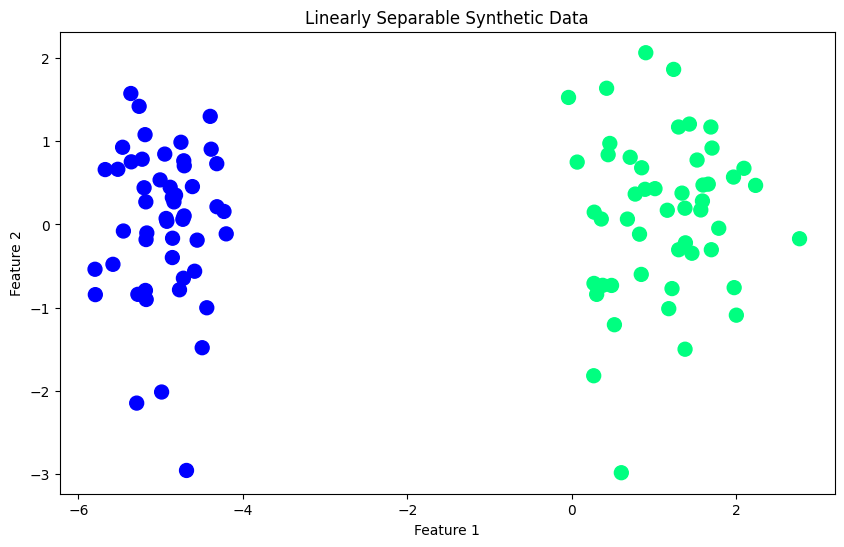

In [41]:
# Libraries and Utilities import
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

# Making the 100 labeled 2D data points
X,y = make_classification(n_samples=100,n_features = 2, n_informative=1 ,n_redundant = 0 ,n_classes = 2 , n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=30)
print(X.shape)
print(X[0:6])
print(y.shape)
print(y[0:6])

# 100 total samples , 2 features each , 1 of the 2 features actually helps distinguish between the classes ,  No redundant features , binary classification problem(0 or 1)
# each class form a single cluster ,random_state = 41 ensures same data every time ,  points won’t be spread across corners of a hypercube—useful for simple visualization
# Controls how far apart the classes are

plt.figure(figsize=(10,6)) # width and height of the plot in inches
plt.xlabel("Feature 1") # Say, cpi
plt.ylabel("Feature 2") # Say , iq
plt.title("Linearly Separable Synthetic Data") # May be a placement data , whether a student getting placd or not
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100) # Color Coding based on y (0 or 1) #S is for size of the points #cmap is color specification
# X is a 2D array or matrix of 100 rows and 2 columns feature 1 and feature 2
# So selecting all its rows first feature in X[:,0] while second feature in X[:,1] , it return a 1D array of the respective features

Line Equation : 2.266009893659332x+0.18852405981709847y+2.536898703336613= 0
y = -12.0197384665796*x+-13.456630977488238


(-3.0, 2.0)

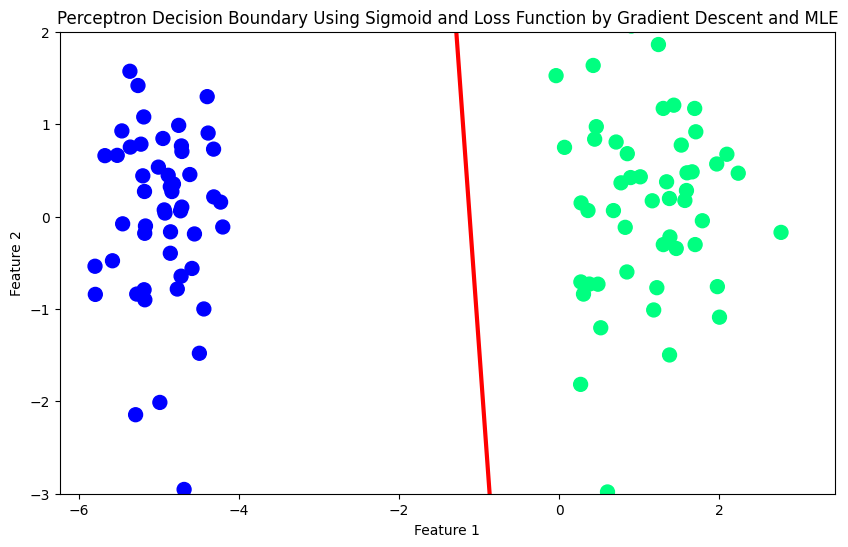

In [42]:

# Defining Sigmoid Function
def sigmoid(z) :
  return 1/(1+np.exp(-z))

# Gradient Descent
def graddesc(X,y) :
  X_temp = X.copy()
  X = np.insert(X,0,1,axis = 1) # to insert the bias column ahead of the two features (as 0th column)
  weights = np.ones(X.shape[1]) # Now after inserting the bias column the count becomes 3 so , weights = [1,1,1]
  learning_rate = 0.9
  epochs = 10000
  for i in range(epochs) :
    j = np.random.randint(0,100) # To pick the point according to which line is to be adjusted
    y_hat = sigmoid(np.dot(X[j],weights))
    weights = weights +  learning_rate*(y[j]-y_hat)*X[j]/X.shape[0]
  X = X_temp
  return weights[0],weights[1:]


C,[A,B]  = graddesc(X,y)
print(f"Line Equation : {A}x+{B}y+{C}= 0")

# Getting the m,b
intercept = -C/B
slope = -A/B
print(f"y = {slope}*x+{intercept}")
# Plot data points and line so obtained
x_input = np.linspace(-3,3,100)
y_input = slope*x_input + intercept
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary Using Sigmoid and Loss Function by Gradient Descent and MLE')
plt.ylim(-3,2)

## Comparison with Logistic Regression


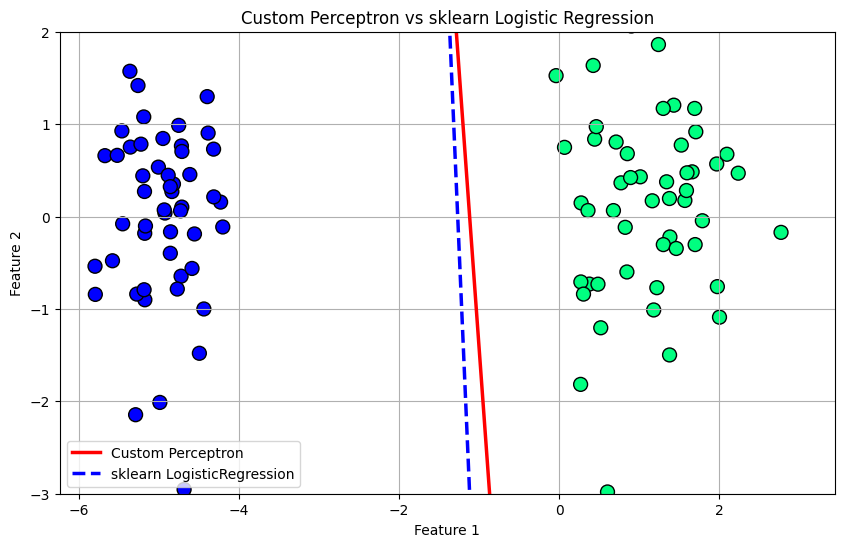

In [43]:
# Logistic Regression
# Logistic Regression from sklearn

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty=None, solver='sag', max_iter=10000)
model.fit(X, y)

# Coefficients from sklearn
coef = model.coef_[0]     # [A, B]
intercept_sk = model.intercept_[0]  # C

# Convert to line: A*x + B*y + C = 0 ⇒ y = (-C - A*x)/B
slope_sk = -coef[0] / coef[1]
intercept_sk_line = -intercept_sk / coef[1]

# Plotting both decision boundaries
x_input = np.linspace(-3, 3, 100)

# Plotting sklearn logistic regression line
y_sklearn = slope_sk * x_input + intercept_sk_line

plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color='red', label='Custom Perceptron', linewidth=2.5)
plt.plot(x_input, y_sklearn, color='blue', linestyle='--', label='sklearn LogisticRegression', linewidth=2.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100, edgecolor='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Custom Perceptron vs sklearn Logistic Regression')
plt.ylim(-3, 2)
plt.legend()
plt.grid(True)
plt.show()